# CSCE 633 :: Machine Learning :: Texas A&M University :: Spring 2022

# Programming Assignment 3 (PA 3)
**Name:**  Ajinkya Zalkikar
**UIN:**   530005943

# Support Vector Machines

- **100 points**
- **Due Tuesday, *April* 12, 11:59 pm**

In this assignment, you'll be training support vector machines for classification.

### Instructions
- You are allowed to use machine learning libraries such as `scikit-learn` for this assignment. A few of the basic library methods have been already imported for you. Feel free to import any additional methods that you need.
- You are required to complete the functions defined in the code blocks following each question. Fill out sections of the code marked `"YOUR CODE HERE"`.
- You are free to add any number of additional code blocks that you deem necessary. 
- Once you've filled out your solutions, submit the notebook on Canvas following the instructions [here](https://people.engr.tamu.edu/guni/csce421/assignments.html).
- Do **NOT** forget to type in your name and UIN at the beginning of the notebook.
- Do **NOT** remove any code provided.

In [29]:
# importing libraries
import sys
import pickle

import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

## Question 1 (10 points)

## Data Preprocessing

For this assignment, we will use the Statlog dataset. This database consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification associated with the central pixel in each neighbourhood. The aim is to predict this classification, given the multi-spectral values. In the sample database, the class of a pixel is coded as a number. The attributes are numerical, in the range 0 to 255. More information about the database can be found [here](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Landsat+Satellite%29).

In [3]:
# Read the data
train_df = pd.read_csv('http://people.tamu.edu/~sumedhpendurkar/csce633/satimage_train.csv')
test_df = pd.read_csv('http://people.tamu.edu/~sumedhpendurkar/csce633/satimage_test.csv')

In [25]:
train_df.head().T

,2,9,10,13,17
Class,6.000000,6.000000,6.000000,6.000000,6.000000
X1,0.562500,0.625000,0.562500,0.625000,0.500000
X2,0.490909,0.545455,0.563636,0.545455,0.454545
X3,0.333333,0.476190,0.333333,0.476190,0.571429
X4,-0.074380,-0.024793,-0.074380,-0.024793,-0.090909
X5,0.354839,0.677419,0.483871,0.548387,0.548387
X6,0.327273,0.545455,0.400000,0.454545,0.381818
X7,0.052632,0.431579,0.136842,0.221053,0.221053
X8,-0.187500,0.046875,-0.125000,-0.078125,-0.125000
X9,0.187500,0.500000,0.187500,0.375000,0.250000


### To-do steps
1. Remove rows with `NaN` values from `df_train` and `df_test`.
2. Create `X_train` and `X_test` by selecting columns `X1` through `X36`. Create `y_train` and `y_test` by selecting column `Class`.
2. Normalize `X_train` using `MinMaxScaler` from scikit-learn. Then normalize `X_test` on the normalization parameters derived from `X_train`.

In [26]:
from sklearn import preprocessing
# Step 1: Drop NaN values
######################
#   YOUR CODE HERE   #
train_df = train_df.dropna(axis=0,how='any')
test_df = test_df.dropna(axis=0, how = 'any')

# Step 2: Create train and test data
######################
#   YOUR CODE HERE   #
######################
X_train = train_df.iloc[:,1:37]
y_train = train_df.iloc[:,0]
X_test = test_df.iloc[:,1:37]
y_test = test_df.iloc[:,0]
# Step 3: Normalize data
######################
#   YOUR CODE HERE   #
######################
scaler = preprocessing.MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [27]:
# Convert to binary classification
y_train[y_train != 6] = 0
y_train[y_train == 6] = 1

y_test[y_test != 6] = 0
y_test[y_test == 6] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7

## Question 2 (30 points) 

## Hyperparameter Tuning 

Consider the binary classification that consists of distinguishing class 6 from the rest of the data points. Use SVMs combined with polynomial kernels to solve this classification problem. For each value of the polynomial degree, $d$ = 1, 2, 3, 4, plot the average 5-fold cross-validation error plus or minus one standard deviation as a function of $C$ (let the other parameters of the polynomial kernels be equal to their default values) on the training data.

**Choose a minimum of 5 $C$ values spread across a wide range**

**Report the best value of the trade-off constant $C$ measured on the training internal cross-validation.**

In [34]:
from matplotlib.font_manager import JSONEncoder
from pandas.core.dtypes.cast import soft_convert_objects
def cross_validation_score(X, y, c_vals, n_folds, d_vals):
    """
    Calculates the cross validation error and returns its mean and standard deviation.
    
    Args:
        X: features
        y: labels
        c_vals: list of C values
        n_folds: number of cross-validation folds
        d_vals: list of degrees of the polynomial kernel
    
    Returns:
        Tuple of (list of error_mean, list of error_std)       
    """
    
    error_mean = np.zeros((len(c_vals),len(d_vals)))
    error_std = np.zeros((len(c_vals),len(d_vals)))
    
    ######################
    #   YOUR CODE HERE   #
    ######################
    m = len(c_vals)
    g = len(d_vals)
    for i in range(m):
      for j in range(g):
        sup = SVC(kernel='poly',C=c_vals[i],degree=d_vals[j],random_state=57)
        val = StratifiedKFold()
        cvscores = cross_val_score(sup,X,y,cv = val)
        errors = 1 - cvscores

        error_mean[i][j] = errors.mean()
        error_std[i][j] = errors.std()


    return error_mean, error_std

In [46]:
######################
#   YOUR CODE HERE   #
######################
n_folds = 5
d_vals= [1, 2, 3, 4]
c_vals =[0.1, 6, 30, 50] # Provide a list of C values

In [47]:
error_mean, error_std = cross_validation_score(X_train, y_train, c_vals, n_folds, d_vals)

**Plot the average cross validation error.**

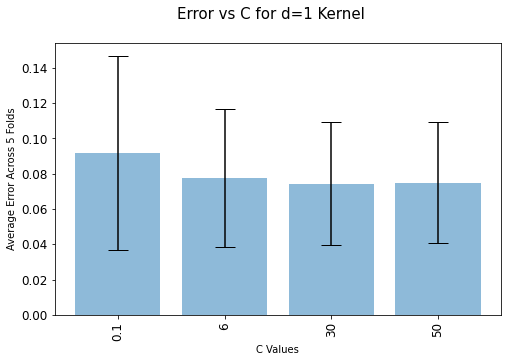

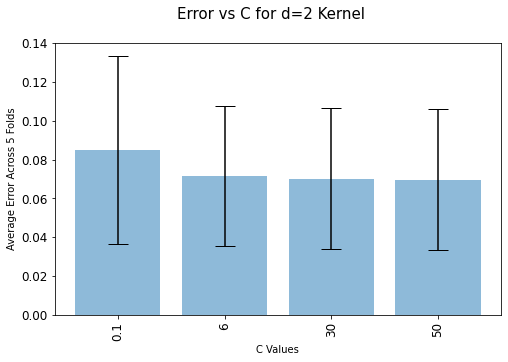

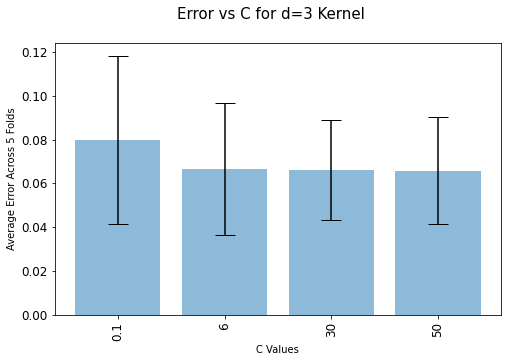

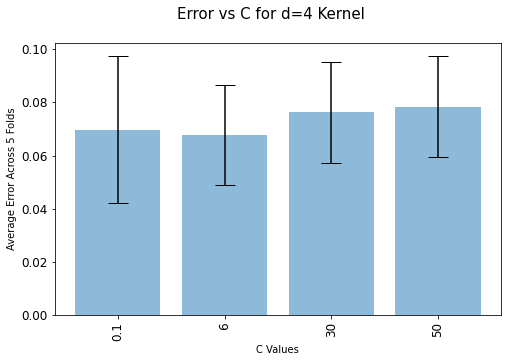

In [48]:
for i,d_val in enumerate(d_vals):
    plt.rcParams.update({'font.size': 12})
    plt.figure(figsize = (8,5)) 
    plt.bar(range(len(c_vals)), error_mean[:,i], 
            yerr=error_std[:,i],
            align='center',
            alpha=0.5,
            ecolor='k',
            capsize=10,
            label = "Average Error")
    plt.suptitle('Error vs C for d={} Kernel'.format(d_val), fontsize=15)
    plt.xlabel('C Values', fontsize=10)
    plt.xticks(range(len(c_vals)), c_vals, rotation='vertical')
    plt.ylabel('Average Error Across {} Folds'.format(n_folds), fontsize=10)

**Plot $(C; d)$ pairs with their corresponding cross validation errors.**

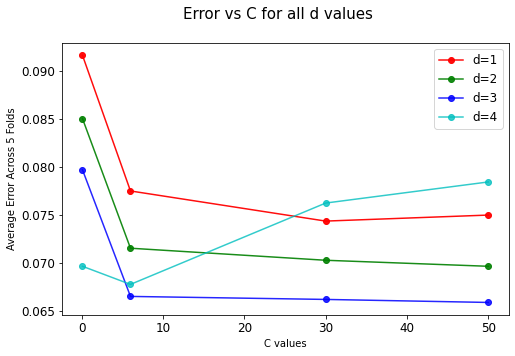

In [49]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (8,5))
colors = ['r', 'g', 'b', 'c', 'y']
for i,d_val in enumerate(d_vals):
    plt.plot(c_vals, error_mean[:,i],
             marker='o', 
             color=colors[i%5], 
             alpha=1 - 0.2 * d_val/len(d_vals), 
             label = "d={}".format(d_val))
plt.suptitle('Error vs C for all d values', fontsize=15)
plt.xlabel('C values', fontsize=10)
plt.ylabel('Average Error Across {} Folds'.format(n_folds), fontsize=10)
plt.legend()

## Question 3 (30 points) 

## Model Training and Testing

**Build models on the full training data on the best $C$ value you found previously for each $d$ value using the 5-fold cross validation.**

You need to return test error, number of support vectors, number of margin violations, and margin size

A data point (i.e., x) is said to violate margin if **distance of data point 
from hyperplane < margin size**. Therefore, number of total margin violations is count of such data points present in dataset.


Hint: Margin Size: Use the dual coefficients (alpha values) of SVM along with support vectors to calculcate margin. Please refer to slide 17 in slide deck 13 for more details.

In [54]:
def build_model(X_train, y_train, X_test, y_test, c_vals, d_vals):
    """
    Trains model on a dataset for given values of C and d. Returns the error on the test data,
    the number of support vectors, the number of margin violations, and the margin size.
    
    Args:
        X_train: features in training data
        y_train: train labels
        X_test: features in test data
        y_test: test labels
        c_vals: list of C values
        d_vals: list of degrees of the polynomial kernel
    
    Returns:
        Tuple of (error_test, support_vectors, margin_violations, margin_size)       
    """
    error_test = np.zeros(len(d_vals))
    support_vectors = np.zeros(len(d_vals))
    margin_violations = np.zeros(len(d_vals))
    margin_size = np.zeros(len(d_vals))
    
    ######################
    #   YOUR CODE HERE   #
    ######################
    g = len(d_vals)
    for i in range(g):
      sup2 = SVC(kernel = 'poly',C = c_vals[i],degree = d_vals[i],random_state=57)
      sup2.fit(X_train,y_train)
      pred = sup2.predict(X_test)
      err = mean_absolute_error(y_test,pred)
      error_test[i]=err
      support_vectors[i]=len(sup2.support_)
      denom = np.sqrt(np.sum(sup2.dual_coef_[0].dot(sup2.support_vectors_)**2))
      marginsize = 1/denom
      distance = np.abs(sup2.decision_function(sup2.support_vectors_))
      margin_size[i] = marginsize
      marviols = distance[distance<marginsize]
      margin_violations[i] = len(marviols)
  
    return error_test, support_vectors, margin_violations, margin_size

In [61]:
######################
#   YOUR CODE HERE   #
######################
d_vals= [1,2,3,4] # List of degrees
c_vals = [30,30,6,6]# Provide a list of corresponding best C values

In [62]:
error_test, support_vectors, margin_violations, margin_size = build_model(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          c_vals, d_vals)

**Plot the test errors for each model, as a function of $d$.**

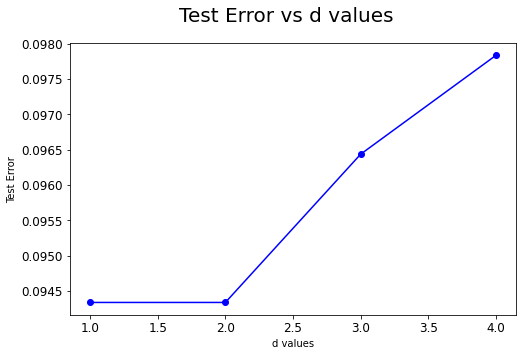

In [63]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (8,5)) 
plt.plot(d_vals, error_test ,marker='o', color='b')
plt.suptitle('Test Error vs d values', fontsize=20)
plt.xlabel('d values', fontsize=10)
plt.ylabel('Test Error', fontsize=10);

## Question 4 (10 points) 

## Number of support vectors

**Plot the number of support vectors obtained as a function of $d$.**

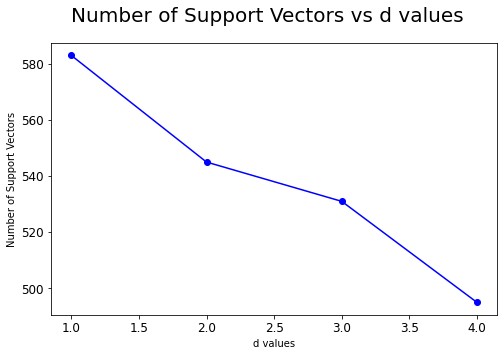

In [64]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (8,5)) 
plt.plot(d_vals, support_vectors, marker='o', color='b')
plt.suptitle('Number of Support Vectors vs d values', fontsize=20)
plt.xlabel('d values', fontsize=10)
plt.ylabel('Number of Support Vectors', fontsize=10);

## Question 5 (10 points)

## Number of Margin Violations

**Plot the number of support vectors that violate the margin hyperplanes as a function of $d.**

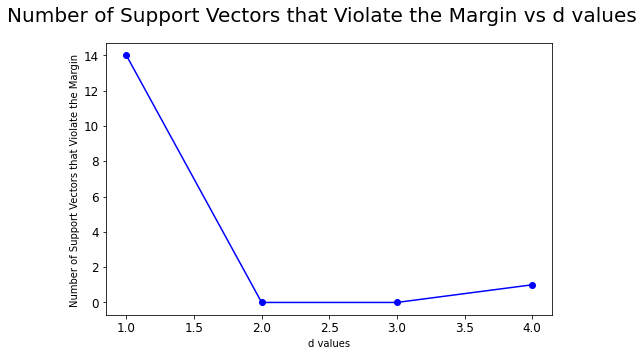

In [65]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (8,5)) 
plt.plot(d_vals, margin_violations, marker='o', color='b')
plt.suptitle('Number of Support Vectors that Violate the Margin vs d values', fontsize=20)
plt.xlabel('d values', fontsize=10)
plt.ylabel('Number of Support Vectors that Violate the Margin ', fontsize=10);

## Question 6 (10 points) 

## Margin Size vs Support Vectors

**Explain how the parameter $d$ infuences the model fit (plot the margin size as a function of $d).**

Make sure to plot **AND** explain.

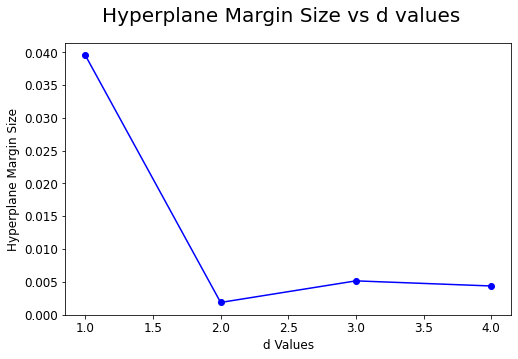

In [66]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize = (8,5)) 
plt.plot(d_vals, margin_size, marker='o', color='b')
plt.suptitle('Hyperplane Margin Size vs d values', fontsize=20)
plt.xlabel('d Values', fontsize=12)
plt.ylabel('Hyperplane Margin Size', fontsize=12);

In [ ]:
## TYPE YOUR ANSWER BELOW

The model fit is dependent on the degree of polynomial kernel, which in turn affects the error of the model. As can be seen in the error vs degree plot, the error is fairly similar for degrees 1 & 2 with a c value of 30 in either case, however, the number of support vectors that violate the margin go down from 14 to 0 from degree 1 to degree 2. Thus, model with degree=2 & c=30 is the better model from the 2 models in question.